# `geopandas` 
Geopandas is a python library that ecxtends `pandas` by adding support fpr geospatail daya. 

## Reproducble file paths 

In [1]:
# Import libraries 
import os 
import geopandas as gpd
import matplotlib.pyplot as plt

To import the data, we first used `os` to create a reproducible file path.

In [2]:
# Import and join data 
fp = os.path.join('data', 'gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

In [3]:
# Load in data 
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [4]:
fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')
ca_boundary = gpd.read_file(fp)
ca_boundary.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [5]:
## GeoSeries and GeoDataframe 


## Geoserioes and geodataframe 

Geopandas.geoDataFRame = core struncture in geopandas = `pandas.Dataframe` plus a decicated geometery 

**geometery column** holds the geometery (points, polygons)


In [6]:
# Check data types 
print(type(pigs))

print(type(pigs.geometry))

print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [7]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [8]:
# check each type of each elemenet in the geom column 
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

What is the geometery type of athe single feature in the CA sytaye noundary 

In [9]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS 

CRS: instruntions to locate each spataiil features of our data frane ib rteh surface of earth 


In [10]:
# Access CRS of the geoDataFrame 
pigs.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
print('Ellipsoid:', pigs.crs.ellipsoid)
print('Datum:', pigs.crs.datum)
print('Is geographic?:', pigs.crs.is_geographic)
print('Is projected:', pigs.crs.is_projected)

Ellipsoid: WGS 84
Datum: World Geodetic System 1984 ensemble
Is geographic?: True
Is projected: False


In [12]:
# ontain the geographic extend of the geo-dataframe 
pigs.total_bounds
# returns: min x, max x, min y, max y 

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [13]:
# Examine CRS and extent of CA boundary 
print('CRS: ', ca_boundary.crs)
print(ca_boundary.total_bounds)

CRS:  EPSG:4326
[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [14]:
# make sure the crs match 
pigs.crs == ca_boundary.crs

True

## Data Wrangling 
`pandas` data wrangling to wrangel

### filter and plot 

In [15]:
# examine pig observatiosn by year 
pigs['year'].value_counts().sort_index()



year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [21]:
# Select data from 2020 onWARDS 
pigs_recent = pigs[pigs['year'] >= 2020]

# check OG df length 
print('total number of observations', len(pigs))

print('number of obser from 2020', len(pigs_recent))

total number of observations 1046
number of obser from 2020 606


<Axes: >

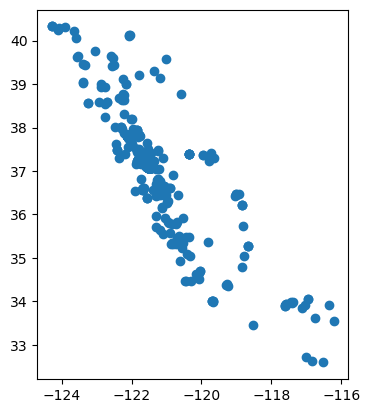

In [ ]:
# Create a map 
pigs_recent.plot()

## 'matplotlib'

We can interact it via 'pyplot' interface 
data in a **figure** that can have 1+ axes. Axes is only the areas peecified by the x axis and the y axis what is plooted in it. A Figure can include multiple axes in it. 

Blank figure: 


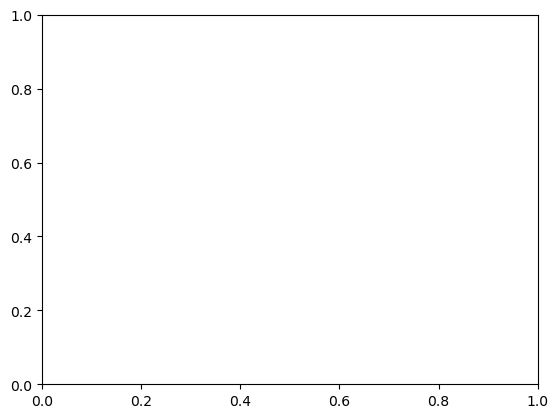

In [18]:
# Initailize empy figure and axis 
fig, ax = plt.subplots() # Returns 2 objects: figure and axis 

# Display the figure


### Adding a layer 


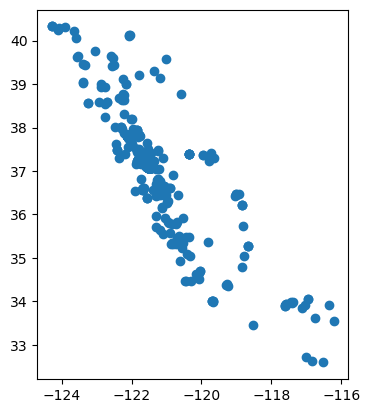

In [ ]:
fig, ax = plt.subplots() # Emoty figyure
pigs_recent.plot(ax=ax) # Add shit 
plt.show() # show fig 

### Custoimization 

Can be done to plot or axis 

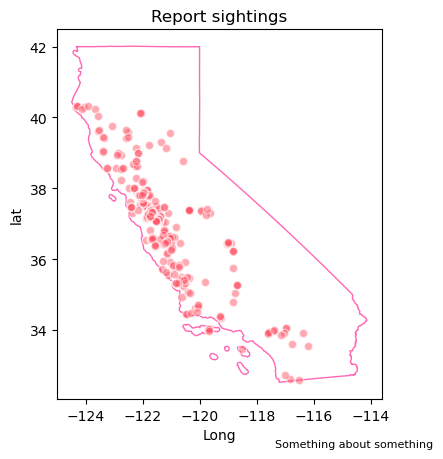

In [51]:
# Empty figure
fig, ax = plt.subplots() 

# Add CA  boundary
ca_boundary.plot(ax = ax, 
                 facecolor = 'none', 
                 edgecolor= 'hotpink')

# Plot pig data
pigs_recent.plot(ax=ax, 
                 color = '#FF5769', # Add shit 
                 alpha= 0.5, 
                 edgecolor= 'white') 
                 
# Labeling 
ax.set_title('Report sightings') # title 
ax.set_xlabel('Long') # axis lables 
ax.set_ylabel('lat')
plt.figtext(0.6, 0.01, 'Something about something', wrap=True, fontsize=8)

# Show fig 
plt.show() 
